In [6]:
import pandas as pd
df = pd.read_excel("C:/it/result_8.xlsx")

In [7]:
df

,Date,KOSPI,KOSDAQ,USDKRW,JPYKRW,EURKRW,CNYKRW,WTI,GOLD,SP500,NASIXIC,DOW,KOR3I,CBAA3I,CALLRATE
0,2011-04-01,2121.01,532.06,1091.0,1303.31,1545.62,166.60,107.94,1428.1,1332.41,2789.60,12376.72,3.67,4.47,2.98
1,2011-04-04,2115.87,534.90,1087.0,1293.28,1544.63,166.23,108.47,1432.2,1332.87,2789.19,12400.03,3.68,4.47,2.99
2,2011-04-05,2130.43,537.66,1090.0,1293.31,1546.06,166.67,108.34,1451.8,1332.63,2791.19,12393.90,3.69,4.48,3.03
3,2011-04-06,2126.71,533.98,1086.0,1279.91,1552.44,166.01,108.83,1457.7,1335.54,2799.82,12426.75,3.70,4.49,3.04
4,2011-04-07,2122.14,534.97,1088.5,1276.83,1556.23,166.33,110.30,1458.5,1333.51,2796.14,12409.49,3.68,4.48,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2021-03-23,3004.74,946.31,1130.5,1042.08,1343.32,173.64,57.76,1725.1,3910.52,13227.70,32423.15,1.13,2.07,0.49
2459,2021-03-24,2996.35,953.82,1132.5,1041.57,1338.73,173.62,61.18,1733.2,3889.14,12961.89,32420.06,1.11,2.05,0.47
2460,2021-03-25,3008.33,954.99,1134.5,1039.87,1340.18,173.47,58.56,1725.1,3909.52,12977.68,32619.48,1.08,2.04,0.51
2461,2021-03-26,3041.01,956.70,1131.5,1032.58,1333.08,172.94,60.97,1732.3,3974.54,13138.72,33072.88,1.11,2.05,0.48


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import seaborn as sns

In [31]:
from scipy import stats

In [24]:
k = (df['KOSPI']/df['KOSPI'].loc[0]) *100
kd = (df['KOSDAQ']/df['KOSDAQ'].loc[0])*100
do = (df['DOW']/df['DOW'].loc[0])*100
uk = (df['USDKRW']/df['USDKRW'].loc[0])*100
go = (df['GOLD']/df['GOLD'].loc[0])*100

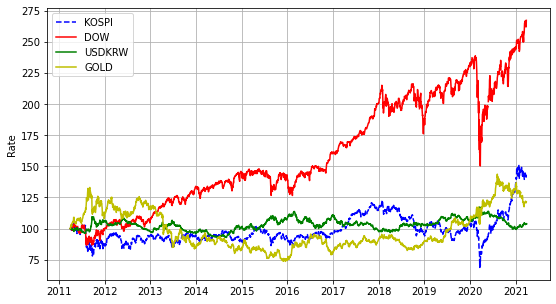

In [28]:
plt.figure(figsize=(9,5))
plt.plot(df['Date'],(df['KOSPI']/df['KOSPI'].iloc[0]) *100,'b--')
plt.plot(df['Date'],(df['DOW']/df['DOW'].iloc[0])*100,'r')
plt.plot(df['Date'],(df['USDKRW']/df['USDKRW'].loc[0])*100,'g-')
plt.plot(df['Date'],(df['GOLD']/df['GOLD'].iloc[0])*100,'y')
plt.ylabel('Rate')
plt.grid(True)
plt.legend(['KOSPI','DOW','USDKRW','GOLD'])
plt.show()

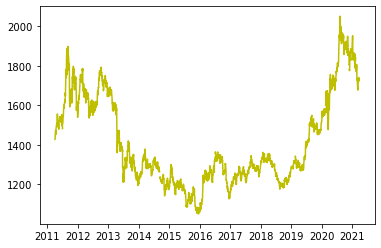

In [30]:
plt.plot(df['Date'],df['GOLD'],'y')

In [32]:
df2 = pd.DataFrame({'X':df['DOW'],'Y':df['KOSPI']})

In [59]:
regr = stats.linregress(df2.X,df2.Y);regr #기울기, y절편, r값(상관계수), p값, 표준편차 순서대로


LinregressResult(slope=0.031223448878177015, intercept=1491.2140346960664, rvalue=0.7065768718391493, pvalue=0.0, stderr=0.0006303412771089532, intercept_stderr=12.879514906934926)

In [43]:
df2 = df2.fillna(method='bfill')
df2 = df2.fillna(method='ffill')

In [48]:
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

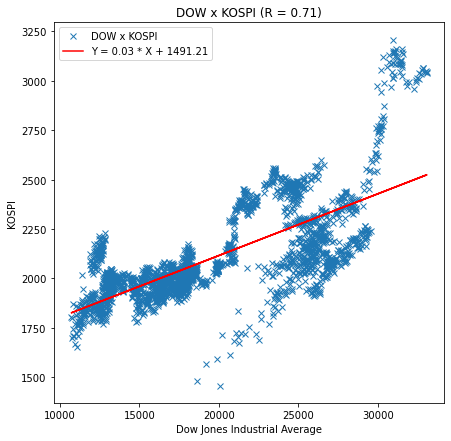

In [55]:
plt.figure(figsize=(7,7))
plt.plot(df2.X,df2.Y,'x')
plt.plot(df2.X, regr.slope*df2.X+regr.intercept,'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [97]:
df4 = pd.DataFrame({'A':df['GOLD'],'B':df['KOSPI']})

In [98]:
df4 = df4.fillna(method='bfill')
df4 = df4.fillna(method='ffill')

In [99]:
regr2 = stats.linregress(df4.A,df4.B);regr2

LinregressResult(slope=0.16903625349744092, intercept=1866.87397458461, rvalue=0.15595923451668228, pvalue=7.038561956308102e-15, stderr=0.021580719873053728, intercept_stderr=30.852533012223134)

In [100]:
regr_line2 = f'B = {regr2.slope:.2f} * A + {regr2.intercept:.2f}'

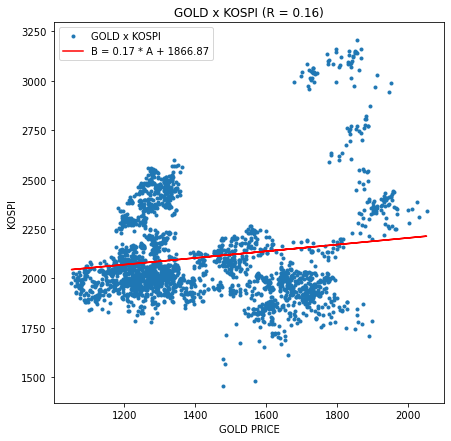

In [104]:
plt.figure(figsize=(7,7))
plt.plot(df4.A,df4.B,'.')
plt.plot(df4.A, regr2.slope*df4.A+regr2.intercept,'r')
plt.legend(['GOLD x KOSPI', regr_line2])
plt.title(f'GOLD x KOSPI (R = {regr2.rvalue:.2f})')
plt.xlabel('GOLD PRICE')
plt.ylabel('KOSPI')
plt.show()

In [108]:
df5 = pd.DataFrame({'C':df['USDKRW'],'D':df['KOSPI']})

In [109]:
df5 = df5.fillna(method='bfill')
df5 = df5.fillna(method='ffill')

In [110]:
regr3 = stats.linregress(df5.C,df5.D);regr3

LinregressResult(slope=-0.7130686338821827, intercept=2908.00876161813, rvalue=-0.1413941912971136, pvalue=1.8010811093489678e-12, stderr=0.10063723552674894, intercept_stderr=113.36045174922661)

In [111]:
regr_line3 = f'D = {regr3.slope:.2f} * C + {regr3.intercept:.2f}'

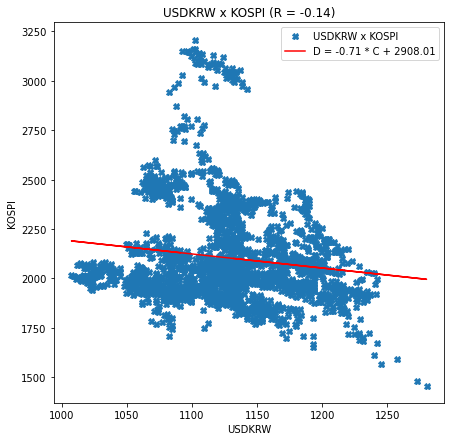

In [112]:
plt.figure(figsize=(7,7))
plt.plot(df5.C,df5.D,'X')
plt.plot(df5.C, regr3.slope*df5.C+regr3.intercept,'r')
plt.legend(['USDKRW x KOSPI', regr_line3])
plt.title(f'USDKRW x KOSPI (R = {regr3.rvalue:.2f})')
plt.xlabel('USDKRW')
plt.ylabel('KOSPI')
plt.show()

In [74]:
df

,Date,KOSPI,KOSDAQ,USDKRW,JPYKRW,EURKRW,CNYKRW,WTI,GOLD,SP500,NASIXIC,DOW,KOR3I,CBAA3I,CALLRATE
0,2011-04-01,2121.01,532.06,1091.0,1303.31,1545.62,166.60,107.94,1428.1,1332.41,2789.60,12376.72,3.67,4.47,2.98
1,2011-04-04,2115.87,534.90,1087.0,1293.28,1544.63,166.23,108.47,1432.2,1332.87,2789.19,12400.03,3.68,4.47,2.99
2,2011-04-05,2130.43,537.66,1090.0,1293.31,1546.06,166.67,108.34,1451.8,1332.63,2791.19,12393.90,3.69,4.48,3.03
3,2011-04-06,2126.71,533.98,1086.0,1279.91,1552.44,166.01,108.83,1457.7,1335.54,2799.82,12426.75,3.70,4.49,3.04
4,2011-04-07,2122.14,534.97,1088.5,1276.83,1556.23,166.33,110.30,1458.5,1333.51,2796.14,12409.49,3.68,4.48,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2021-03-23,3004.74,946.31,1130.5,1042.08,1343.32,173.64,57.76,1725.1,3910.52,13227.70,32423.15,1.13,2.07,0.49
2459,2021-03-24,2996.35,953.82,1132.5,1041.57,1338.73,173.62,61.18,1733.2,3889.14,12961.89,32420.06,1.11,2.05,0.47
2460,2021-03-25,3008.33,954.99,1134.5,1039.87,1340.18,173.47,58.56,1725.1,3909.52,12977.68,32619.48,1.08,2.04,0.51
2461,2021-03-26,3041.01,956.70,1131.5,1032.58,1333.08,172.94,60.97,1732.3,3974.54,13138.72,33072.88,1.11,2.05,0.48


In [9]:
df.corr()

,KOSPI,KOSDAQ,USDKRW,JPYKRW,EURKRW,CNYKRW,WTI,GOLD,SP500,NASIXIC,DOW,국고채3년금리,회사채3년금리,콜금리
KOSPI,1.000000,0.797738,-0.141715,-0.349827,-0.303944,-0.436404,-0.278136,0.150821,0.712755,0.735990,0.705497,-0.395027,-0.269082,-0.565699
KOSDAQ,0.797738,1.000000,0.162018,-0.543488,-0.582988,-0.295593,-0.614184,-0.025190,0.838408,0.831733,0.822872,-0.700993,-0.601789,-0.799016
USDKRW,-0.141715,0.162018,1.000000,0.105137,-0.214448,0.311917,-0.614170,0.118412,0.311433,0.323688,0.300606,-0.531180,-0.442028,-0.423511
JPYKRW,-0.349827,-0.543488,0.105137,1.000000,0.740307,0.270709,0.497816,0.665409,-0.539525,-0.426536,-0.519919,0.590267,0.719330,0.653414
EURKRW,-0.303944,-0.582988,-0.214448,0.740307,1.000000,0.307086,0.749404,0.503309,-0.574531,-0.469966,-0.565098,0.754041,0.853219,0.731141
CNYKRW,-0.436404,-0.295593,0.311917,0.270709,0.307086,1.000000,0.121132,0.003056,-0.448718,-0.400145,-0.487123,0.207735,0.161463,0.305152
WTI,-0.278136,-0.614184,-0.614170,0.497816,0.749404,0.121132,1.000000,0.167241,-0.645107,-0.612485,-0.606900,0.882333,0.836247,0.855112
GOLD,0.150821,-0.025190,0.118412,0.665409,0.503309,0.003056,0.167241,1.000000,0.088013,0.237295,0.063444,0.080059,0.345588,0.111169
SP500,0.712755,0.838408,0.311433,-0.539525,-0.574531,-0.448718,-0.645107,0.088013,1.000000,0.982056,0.989717,-0.823655,-0.699623,-0.873832
NASIXIC,0.735990,0.831733,0.323688,-0.426536,-0.469966,-0.400145,-0.612485,0.237295,0.982056,1.000000,0.959137,-0.789566,-0.616831,-0.845518


In [8]:
df1 = df.corr()

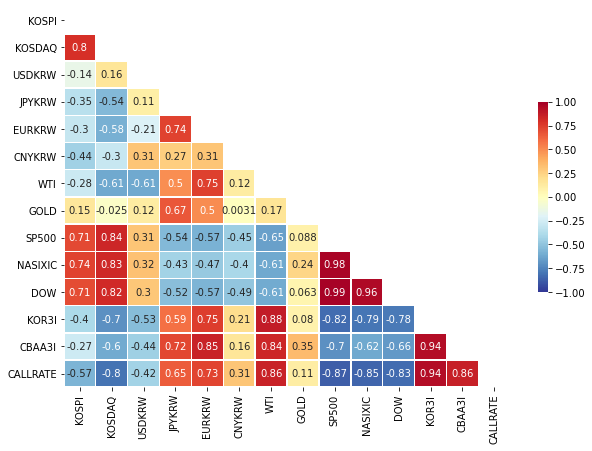

In [15]:
fig,ax = plt.subplots(figsize=(10,7))
mask = np.zeros_like(df1,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df1, cmap = 'RdYlBu_r', annot = True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)  
plt.show()


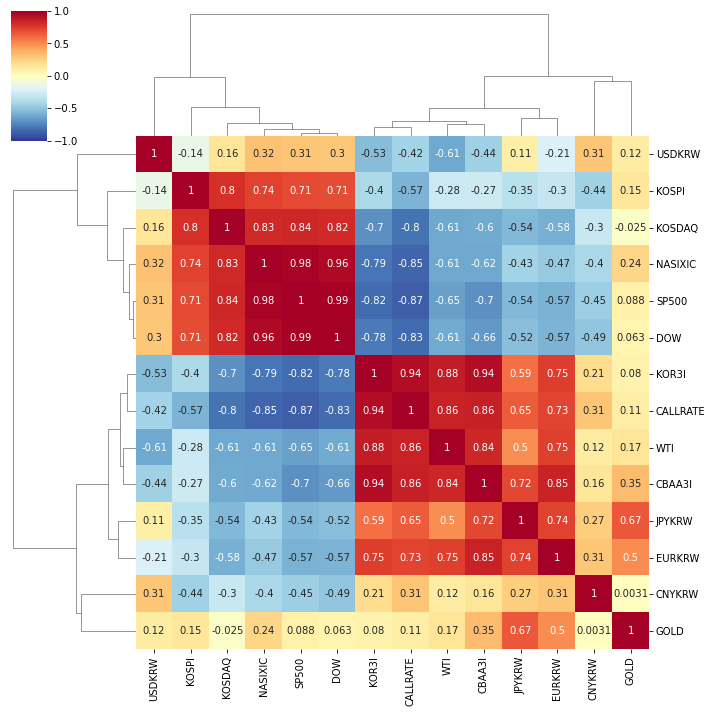

In [9]:
sns.clustermap(df1,annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1) # 실제값나타내기, 색상, 컬러차트범례표시 #clustermap:비슷한것끼리

